<a href="https://colab.research.google.com/github/Srikanth-Kb/MNIST_Recognition/blob/master/mnist_recognition_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch torchvision

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
training_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
training_loader = torch.utils.data.DataLoader(dataset=training_dataset,batch_size=100, shuffle=True)

  0%|          | 16384/9912422 [00:00<01:11, 137866.06it/s]

9920512it [00:00, 30025135.29it/s]                           


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 448519.57it/s]
  1%|          | 16384/1648877 [00:00<00:11, 139716.33it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 7349645.53it/s]                           
8192it [00:00, 182599.45it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1,2,0)
  image = image*np.array((0.5,0.5,0.5))+np.array((0.5,0.5,0.5))
  image = image.clip(0,1)
  return image

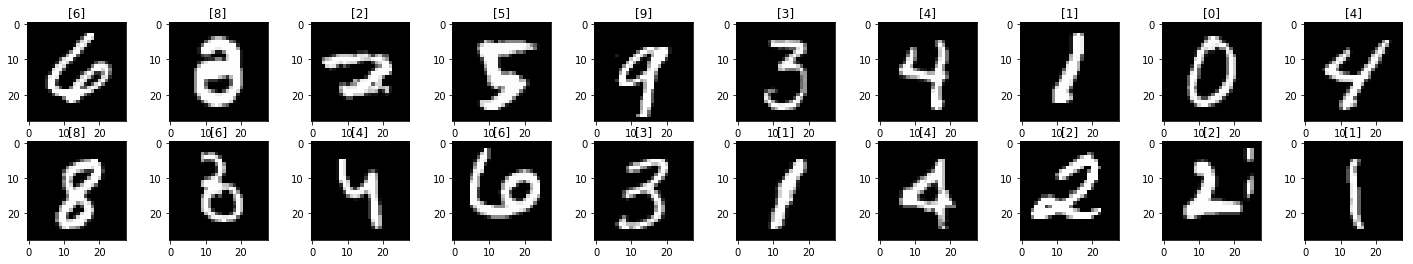

In [5]:
dataiter=iter(training_loader)
images,labels = dataiter.next()
fig = plt.figure(figsize=(25,4))

for i in np.arange(20):
  ax = fig.add_subplot(2,10,i+1)
  plt.imshow(im_convert(images[i]))
  ax.set_title([labels[i].item()])
  


In [0]:
class Classifier(nn.Module):
  def __init__(self,D_in,H1,H2,D_out):
    super().__init__()
    self.linear1 = nn.Linear(D_in,H1)
    self.linear2 = nn.Linear(H1,H2)
    self.linear3 = nn.Linear(H2, D_out)
  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = self.linear3(x)
    return x
    

In [0]:
model = Classifier(784, 125, 65, 10)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [14]:
epochs = 12
running_loss_history = []
running_correct_history = list()

for e in range(epochs):
  running_loss = 0.0 
  running_corrects = 0.0
  for inputs,labels in training_loader:
    inputs = inputs.view(inputs.shape[0], -1)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, prediction = torch.max(outputs,1)
    running_corrects+=torch.sum(prediction == labels.data)
    running_loss+=loss.item()
  else:
    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/len(training_loader)
    running_loss_history.append(epoch_loss)
    running_correct_history.append(epoch_acc)
    print('training loss:{:.4f},acc:{:.4f}'.format(epoch_loss, epoch_acc.item()))
    

training loss:0.8922,acc:78.1750
training loss:0.3732,acc:89.4700
training loss:0.3143,acc:90.9050
training loss:0.2837,acc:91.7000
training loss:0.2604,acc:92.3100
training loss:0.2399,acc:92.9667
training loss:0.2219,acc:93.5417
training loss:0.2049,acc:94.0233
training loss:0.1897,acc:94.4917
training loss:0.1771,acc:94.7917
training loss:0.1656,acc:95.1833
training loss:0.1547,acc:95.4550


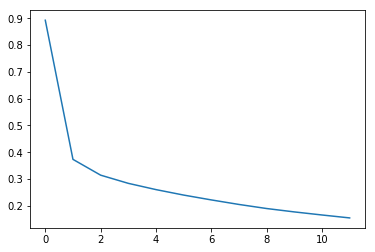

In [15]:
plt.plot(running_loss_history, label='training-loss')

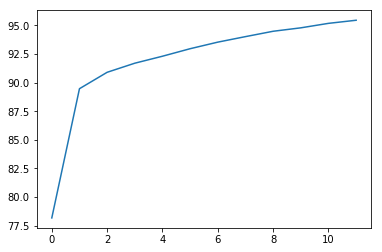

In [17]:
plt.plot(running_correct_history, label='training-accuracy')